<a href="https://colab.research.google.com/github/harshitabhambhani/ML-DL-models/blob/main/Image_Classification_CIFAR_10_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image classification on the CIFAR-10 dataset using CNN**

## **Install Required Libraries:**

In [1]:
!pip install tensorflow numpy matplotlib


## **Import Libraries:**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


## **Load and Preprocess Data:**

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


## **Build the CNN Model:**

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## **Train the Model:**

In [5]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.5277 - accuracy: 0.4419 - val_loss: 1.2393 - val_accuracy: 0.5569
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1724 - accuracy: 0.5845 - val_loss: 1.1210 - val_accuracy: 0.6038
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0277 - accuracy: 0.6391 - val_loss: 1.0833 - val_accuracy: 0.6253
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9259 - accuracy: 0.6743 - val_loss: 0.9730 - val_accuracy: 0.6648
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8509 - accuracy: 0.7002 - val_loss: 0.9546 - val_accuracy: 0.6691
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7862 - accuracy: 0.7228 - val_loss: 0.9037 - val_accuracy: 0.6916
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7398 - accuracy: 0.7411 - val_loss: 0.9237 -

## **Evaluate the Model:**

313/313 - 5s - loss: 0.8803 - accuracy: 0.7117 - 5s/epoch - 15ms/step
Test accuracy: 0.7117000222206116


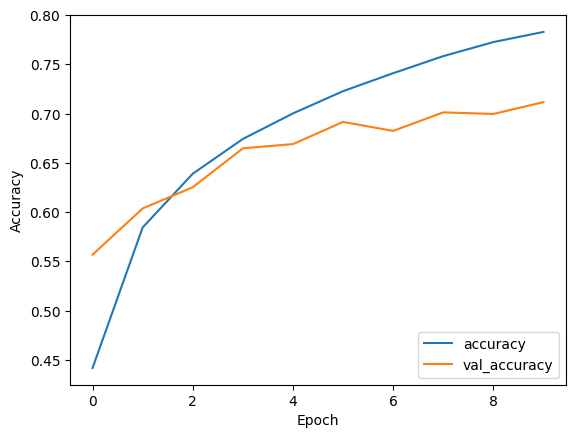

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
